# World Economic Report

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec

## Objective 1 - Prepare & QA the Data

### Determine initial file size before optimizing file size by changing data types

In [2]:
wb_df = pd.read_excel("WorldBank.xlsx")
wb_df.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

### Gather descriptive statistics on the World Bank data frame

In [3]:
wb_df.describe().round()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
count,12449.0,11440.0,11416.0,5848.0,9.578000e+03,9575.0,5064.0,9984.0,11176.0,11845.0,5208.0
mean,1989.0,29.0,11.0,3175.0,1.700740e+11,8232.0,23.0,52.0,64.0,319.0,8.0
std,17.0,13.0,5.0,4467.0,8.979866e+11,16174.0,28.0,46.0,11.0,1593.0,6.0
min,1960.0,7.0,1.0,0.0,8.824450e+06,35.0,0.0,1.0,19.0,0.0,0.0
25%,1974.0,17.0,7.0,390.0,1.393010e+09,513.0,1.0,14.0,56.0,20.0,4.0
50%,1989.0,28.0,9.0,1542.0,7.275305e+09,1853.0,8.0,37.0,67.0,64.0,7.0
75%,2004.0,41.0,13.0,4314.0,4.857782e+10,7775.0,41.0,78.0,73.0,145.0,11.0
max,2018.0,58.0,54.0,54799.0,2.050000e+13,189171.0,100.0,279.0,85.0,21389.0,38.0


### Determining the number of unique values for each column to see if any column is a candidate to be a "category" data type

In [4]:
wb_df.nunique()

Country Name                                                      211
Country Code                                                      211
Region                                                              7
IncomeGroup                                                         5
Year                                                               59
Birth rate, crude (per 1,000 people)                             7732
Death rate, crude (per 1,000 people)                             6731
Electric power consumption (kWh per capita)                      5823
GDP (USD)                                                        8600
GDP per capita (USD)                                             9551
Individuals using the Internet (% of population)                 4036
Infant mortality rate (per 1,000 live births)                    1726
Life expectancy at birth (years)                                10080
Population density (people per sq. km of land area)             11789
Unemployment (% of t

### Reduce file size by eliminating un-needed columns and changing some data types

In [5]:
wb_df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Electric power consumption (kWh per capita)', 'GDP (USD)',
       'GDP per capita (USD)',
       'Individuals using the Internet (% of population)',
       'Infant mortality rate (per 1,000 live births)',
       'Life expectancy at birth (years)',
       'Population density (people per sq. km of land area)',
       'Unemployment (% of total labor force) (modeled ILO estimate)'],
      dtype='object')

In [6]:
wb_df = (
    pd.read_excel("WorldBank.xlsx",
                     usecols=['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
                               'Birth rate, crude (per 1,000 people)',
                               'Death rate, crude (per 1,000 people)',
                               'Electric power consumption (kWh per capita)', 'GDP (USD)',
                               'GDP per capita (USD)',
                               'Individuals using the Internet (% of population)',
                               'Infant mortality rate (per 1,000 live births)',
                               'Life expectancy at birth (years)',
                               'Population density (people per sq. km of land area)',
                               'Unemployment (% of total labor force) (modeled ILO estimate)']
                 ).astype(
                    {
                    "Country Name": "category",
                    "Country Code": "category",
                    "Region": "category",
                    "IncomeGroup": "category",
                    "Year": "int16"
                    }
                 )
    )
wb_df.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Country Name                                                  12449 non-null  category
 1   Country Code                                                  12449 non-null  category
 2   Region                                                        12449 non-null  category
 3   IncomeGroup                                                   12449 non-null  category
 4   Year                                                          12449 non-null  int16   
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64 
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64 
 7   Electric power consumption (kWh per capita)               

### Replace spaces with underscore from the column names

In [7]:
# wb_df.columns = [cols.replace(" ", "_") for cols in wb_df.columns]
# wb_df.columns

### Use "GDP" and "GDP per Capita" to calculate population in millions and create a "Population (M)" column.

In [8]:
wb_df.head()  # Before adding "Population_(M) column

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [9]:
wb_df["Population (M)"] = (
                        wb_df.loc[:, "GDP (USD)"] / wb_df.loc[:, "GDP per capita (USD)"] / 1_000_000
                        )                        
wb_df.head()  # After adding "Population_(M) column

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


### Determine descriptive statistics on the new column Population_(M)

In [10]:
wb_df["Population (M)"].describe()

count    9575.000000
mean       29.956728
std       115.803824
min         0.008913
25%         1.051937
50%         5.390515
75%        17.075158
max      1391.895280
Name: Population (M), dtype: float64

### Read HDI file and reduce the number of columns for the join

In [11]:
hdi_df = (
            pd.read_csv("hdi.csv")
        )
hdi_df.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 1008 entries, iso3 to mf_2021
dtypes: float64(1004), object(4)
memory usage: 1.6 MB


In [12]:
hdi_df = (
            pd.read_csv("hdi.csv",
                       usecols=["iso3", "country", "hdi_2014"]
                       )
        )
hdi_df.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iso3      206 non-null    object 
 1   country   206 non-null    object 
 2   hdi_2014  201 non-null    float64
dtypes: float64(1), object(2)
memory usage: 24.2 KB


In [13]:
hdi_df = (
            pd.read_csv("hdi.csv",
                       usecols=["iso3", "country", "hdi_2014"]
                       ).astype(
                            {
                                "iso3": "category",
                                "country": "category"
                            }
                       )
        )
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   iso3      206 non-null    category
 1   country   206 non-null    category
 2   hdi_2014  201 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 22.0 KB


### Determine the number of unique values in the HDI dataframe

In [14]:
hdi_df.nunique()

iso3        206
country     206
hdi_2014    165
dtype: int64

### Determine descriptive statistics on the HDI dataframe

In [15]:
hdi_df.describe()

,hdi_2014
count,201.000000
mean,0.707189
std,0.150333
min,0.370000
25%,0.584000
50%,0.728000
75%,0.819000
max,0.952000


### Filter the data to 2014 and join it with the HDI csv file on "Country Code".

In [16]:
wb_hdi_2014_df = (
                wb_df
                .query("Year == 2014")
                .merge(hdi_df[["iso3", "hdi_2014"]],
                       how="left",
                       left_on="Country Code",
                       right_on="iso3")
                )
wb_hdi_2014_df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


### End of Objective 1

## Objective 2 - Prepare the data for visualization

### Create a "gdp_pivot" table with years as rows, regions as columns, sum of GDP as values.

In [17]:
gdp_pivot = wb_df.pivot_table(
                values="GDP (USD)",
                index="Year",
                columns="Region",
                aggfunc={"GDP (USD)": "sum"}
)
gdp_pivot.tail()

C:\Users\imh\AppData\Local\Temp\ipykernel_38984\4258659411.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gdp_pivot = wb_df.pivot_table(


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2014,2.125384e+13,2.368331e+13,6.407379e+12,3.493321e+12,1.930000e+13,2.582519e+12,1.825987e+12
2015,2.114739e+13,2.040326e+13,5.093158e+12,3.078622e+12,1.975000e+13,2.694091e+12,1.660461e+12
2016,2.181899e+13,2.034738e+13,4.981862e+12,3.081314e+12,2.023000e+13,2.919583e+12,1.544819e+12
2017,2.323630e+13,2.149428e+13,5.517268e+12,3.206355e+12,2.115000e+13,3.345485e+12,1.675318e+12
2018,2.523976e+13,2.300854e+13,5.221480e+12,3.038190e+12,2.221000e+13,3.461884e+12,1.694665e+12


### Create "pop_pivot" table with years as rows, regions as columns, and sum of population as values.

In [18]:
pop_pivot = wb_df.pivot_table(
                values="Population (M)",
                index="Year",
                columns="Region",
                aggfunc={"Population (M)": "sum"}
)
pop_pivot.tail()

C:\Users\imh\AppData\Local\Temp\ipykernel_38984\2639533206.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pop_pivot = wb_df.pivot_table(


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2014,2206.710525,900.877350,616.367571,399.834848,353.399350,1728.011797,964.148409
2015,2224.732374,904.907378,592.400695,408.291485,356.038990,1747.442995,990.647906
2016,2237.307450,909.300770,599.947705,416.489448,359.134621,1770.872575,1017.661034
2017,2253.993127,912.927840,605.778764,424.801448,362.000811,1791.757826,1034.267706
2018,2269.650038,916.801181,599.502917,350.740764,364.266274,1816.491472,1062.120636


### Create "wb_hdi_by_region" table by calculating the average HDI for each region and sorting from highest average HDI to lowest.

In [19]:
wb_hdi_by_region = (
    wb_hdi_2014_df
        .groupby(["Region"], observed=True)
        .agg({
            "hdi_2014": "mean"
            })
        .sort_values(by="hdi_2014", ascending=False)
)
wb_hdi_by_region.head()

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963


In [20]:
# Selecting data points for discussion
mask = wb_hdi_2014_df["Country Name"].isin(["China", "United States", "India"])
wb_hdi_2014_df.loc[mask] [["Country Name", "Region", "Year", "GDP (USD)", "Population (M)"]]

,Country Name,Region,Year,GDP (USD),Population (M)
40,China,East Asia & Pacific,2014,1.040000e+13,1359.233706
87,India,South Asia,2014,2.040000e+12,1296.159809
200,United States,North America,2014,1.750000e+13,317.991024


### End of Objective 2

## Objective 3 - Visualize the data

### Create a stacked area chart showing the growth of GDP over time, with each stack representing a geographic region.

In [21]:
gdp_pivot.tail()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2014,2.125384e+13,2.368331e+13,6.407379e+12,3.493321e+12,1.930000e+13,2.582519e+12,1.825987e+12
2015,2.114739e+13,2.040326e+13,5.093158e+12,3.078622e+12,1.975000e+13,2.694091e+12,1.660461e+12
2016,2.181899e+13,2.034738e+13,4.981862e+12,3.081314e+12,2.023000e+13,2.919583e+12,1.544819e+12
2017,2.323630e+13,2.149428e+13,5.517268e+12,3.206355e+12,2.115000e+13,3.345485e+12,1.675318e+12
2018,2.523976e+13,2.300854e+13,5.221480e+12,3.038190e+12,2.221000e+13,3.461884e+12,1.694665e+12


In [22]:
gdp_pivot.columns

CategoricalIndex(['East Asia & Pacific', 'Europe & Central Asia',
                  'Latin America & Caribbean', 'Middle East & North Africa',
                  'North America', 'South Asia', 'Sub-Saharan Africa'],
                 categories=['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'], ordered=False, dtype='category', name='Region')

<Figure size 640x480 with 0 Axes>

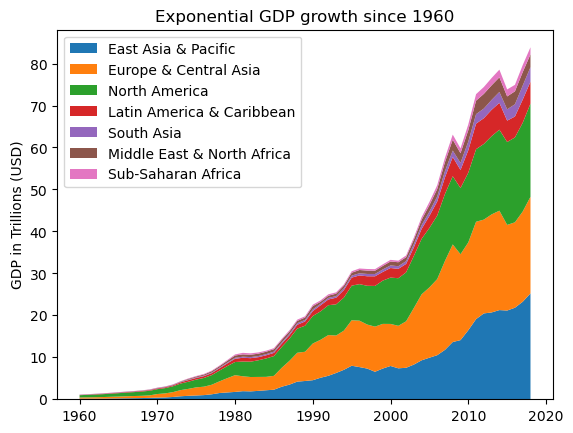

In [23]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],  # Divided by 1 Trillion
    labels=gdp_pivot.iloc[-1].sort_values(ascending=False).index
)
ax.legend(loc="upper left")
ax.set_title("Exponential GDP growth since 1960")
ax.set_ylabel("GDP in Trillions (USD)")
plt.show()

In [24]:
# Sort regions from highest to lowest in GDP and substitute in the list comprehension above for regions and create labels to support a legend.

gdp_pivot.iloc[-1].sort_values(ascending=False).index

CategoricalIndex(['East Asia & Pacific', 'Europe & Central Asia',
                  'North America', 'Latin America & Caribbean', 'South Asia',
                  'Middle East & North Africa', 'Sub-Saharan Africa'],
                 categories=['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'], ordered=False, dtype='category', name='Region')

### Create a stacked area chart showing the growth of population over time, with each stack representing a geographic region.

<Figure size 640x480 with 0 Axes>

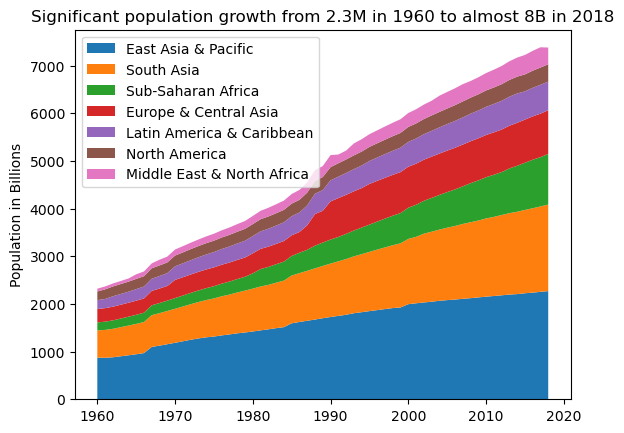

In [25]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.stackplot(
    pop_pivot.index,
    [pop_pivot[region] for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels=pop_pivot.iloc[-1].sort_values(ascending=False).index
)
ax.set_title("Significant population growth from 2.3M in 1960 to almost 8B in 2018")
ax.set_ylabel("Population in Billions")
ax.legend(loc="upper left")
plt.show()

### Create a bubble chart with life expectancy for each country in the x-axis, GDP per capita in the y-axis (log scale), and population as the bubble size. Color the bubbles by region using the same colors for each as in the previous charts.

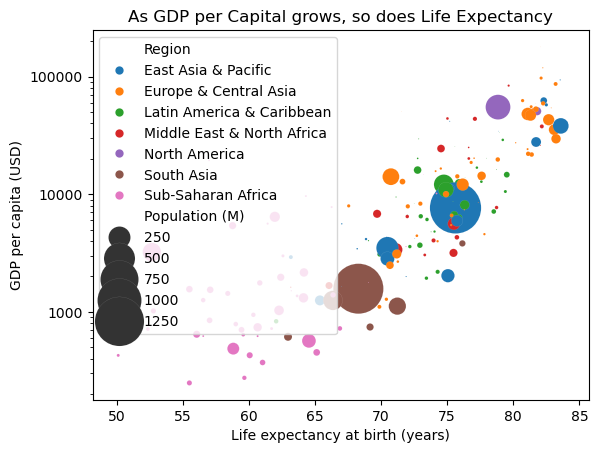

In [26]:
fig, ax = plt.subplots()

# Set bubble size parameters
bubble_min_size = min(wb_hdi_2014_df["Population (M)"])
bubble_max_size = max(wb_hdi_2014_df["Population (M)"])

# Create scatter plot
sns.scatterplot(
        data=wb_hdi_2014_df,
        x="Life expectancy at birth (years)",
        y="GDP per capita (USD)",
        size="Population (M)",
        sizes=(bubble_min_size,bubble_max_size),
        hue="Region",
        ax=ax
).set(
    title="As GDP per Capital grows, so does Life Expectancy",
    yscale="log"
    )
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

### Create a bar chart to show average HDI by region (make sure the region colors match).

In [27]:
wb_hdi_by_region

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963
South Asia,0.611125
Sub-Saharan Africa,0.527745


<Axes: title={'center': 'HDI index by Region'}, xlabel='Region', ylabel='Human Development Index (HDI)'>

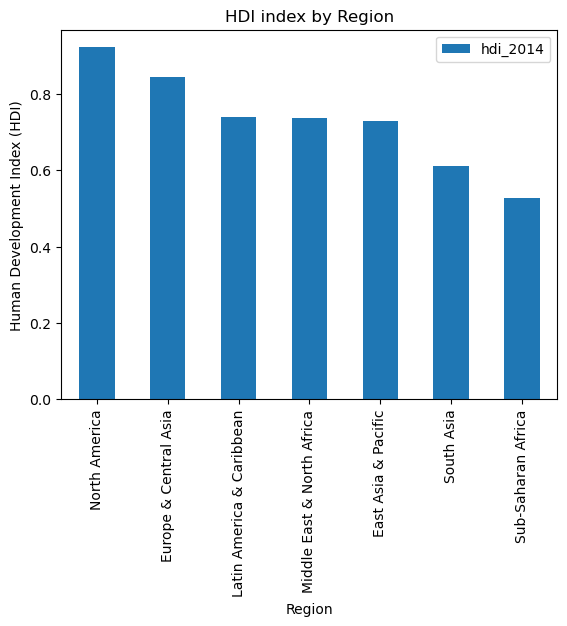

In [28]:
wb_hdi_by_region.plot.bar(
    title="HDI index by Region",
    ylabel="Human Development Index (HDI)"
)

### Create a scatterplot with power consumption in the x-axis and GDP per capita in the y-axis, then use HDI as a color scale for the dots (make sure to remove outliers like Iceland).

In [29]:
wb_hdi_2014_df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


[Text(0.5, 1.0, 'Electric Power Consumption drives GDP growth')]

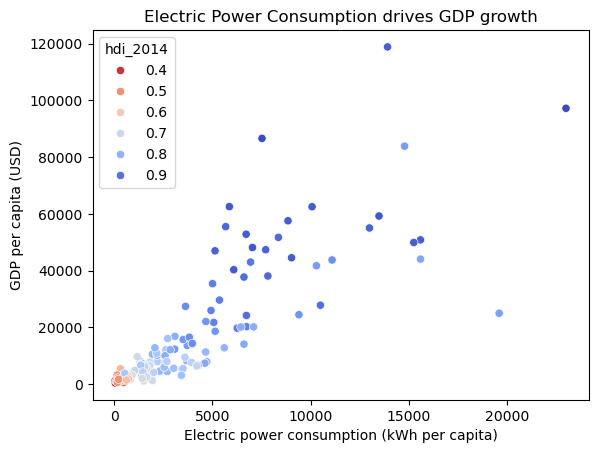

In [30]:
sns.scatterplot(
        data=wb_hdi_2014_df[wb_hdi_2014_df["Country Name"] != "Iceland"],
        x="Electric power consumption (kWh per capita)",
        y="GDP per capita (USD)",
        hue="hdi_2014",
        palette="coolwarm_r"
).set(title="Electric Power Consumption drives GDP growth")

### End of Objective 3

## Objective 4 - Build a Final Report

### Assemble the 5 visualizations you have created into a single page (or figure).

In [31]:
gdp_pivot.iloc[-1].sort_values(ascending=False)

Region
East Asia & Pacific           2.523976e+13
Europe & Central Asia         2.300854e+13
North America                 2.221000e+13
Latin America & Caribbean     5.221480e+12
South Asia                    3.461884e+12
Middle East & North Africa    3.038190e+12
Sub-Saharan Africa            1.694665e+12
Name: 2018, dtype: float64

In [32]:
pop_pivot.iloc[-1].sort_values(ascending=False)

Region
East Asia & Pacific           2269.650038
South Asia                    1816.491472
Sub-Saharan Africa            1062.120636
Europe & Central Asia          916.801181
Latin America & Caribbean      599.502917
North America                  364.266274
Middle East & North Africa     350.740764
Name: 2018, dtype: float64

In [33]:
pop_regions_sorted = pop_pivot.iloc[-1].sort_values(ascending=False).index  

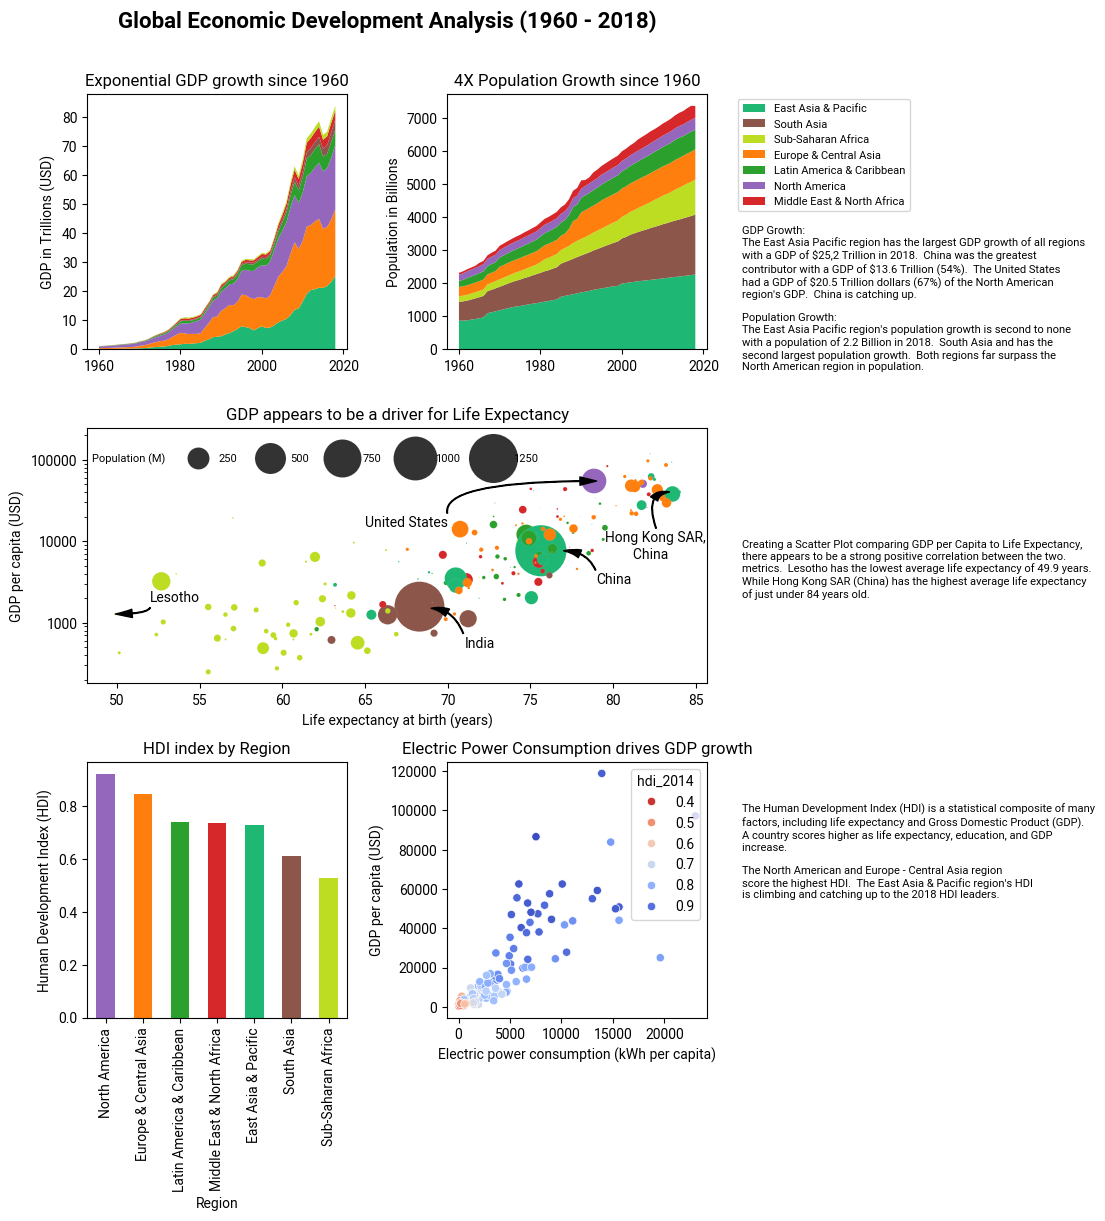

In [34]:
fig = plt.figure(figsize=(8,12))

# GridSpec layout definition
gs = gridspec.GridSpec(nrows=12, ncols=6)

# Change font family
mpl.rcParams["font.family"]= "roboto"

# Figure subtitle
fig.suptitle("Global Economic Development Analysis (1960 - 2018)",
        fontweight="bold",
        fontsize=16,
        x=.5,
        y=.95
        )

# Color Definitions
c_East_Asia_Pacific = "#1fb774"
c_Europe_Central_Asia = "#ff7f0e"
c_Latin_America_Caribbean = "#2ca02c"
c_Middle_East_North_Africa = "#d6272b" 
c_North_America = "#9467bd"
c_South_Asia = "#8c564b" 
c_Sub_Saharan_Africa = "#bcdd22" 

# ax1 figure

# Create ax1 subplot and define colors
ax1 = fig.add_subplot(gs[0:4, 0:3])
ax1_colors = [
            c_East_Asia_Pacific,
            c_Europe_Central_Asia,
            c_North_America,
            c_Latin_America_Caribbean,
            c_South_Asia,
            c_Middle_East_North_Africa,
            c_Sub_Saharan_Africa    
        ]

# Prepare the data for subplot
gdp_regions_sorted = gdp_pivot.iloc[-1].sort_values(ascending=False).index  
gdp_data_to_plot = [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_regions_sorted]  # Divided by 1 Trillion

# Plot the stackplot
ax1.stackplot(
                gdp_pivot.index,
                *gdp_data_to_plot,
                labels=gdp_regions_sorted,
                colors= ax1_colors
            )

# Chart customizations
ax1.set_title(
    "Exponential GDP growth since 1960",
    fontsize=12
)
ax1.set_ylabel("GDP in Trillions (USD)")

# ax2 figure

# Create ax2 subplot and define colors
ax2 = fig.add_subplot(gs[0:4, 3:6])

ax2_colors = [
            c_East_Asia_Pacific,
            c_South_Asia,
            c_Sub_Saharan_Africa,
            c_Europe_Central_Asia,
            c_Latin_America_Caribbean,
            c_North_America,
            c_Middle_East_North_Africa         
        ]

# Prepare the data for subplot
pop_regions_sorted = pop_pivot.iloc[-1].sort_values(ascending=False).index  
pop_data_to_plot = [pop_pivot[region] for region in pop_regions_sorted]
# [pop_pivot[region] for region in pop_pivot.iloc[-1].sort_values(ascending=False).index]

# Plot the stackplot
ax2.stackplot(
    pop_pivot.index,
    *pop_data_to_plot,
    labels=pop_regions_sorted,
    colors=ax2_colors
#    [pop_pivot[region] for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
#    labels=pop_pivot.iloc[-1].sort_values(ascending=False).index
)

# Chart customizations
ax2.set_title(
    "4X Population Growth since 1960",
    fontsize=12
)
ax2.set_ylabel("Population in Billions")
ax2.legend(bbox_to_anchor=(1.8,1), fontsize=8)

fig.text(
    x=.93,
    y=.64,
    s=
    """
    GDP Growth:
    The East Asia Pacific region has the largest GDP growth of all regions
    with a GDP of $25,2 Trillion in 2018.  China was the greatest 
    contributor with a GDP of $13.6 Trillion (54%).  The United States 
    had a GDP of $20.5 Trillion dollars (67%) of the North American 
    region's GDP.  China is catching up.
    
    Population Growth:
    The East Asia Pacific region's population growth is second to none
    with a population of 2.2 Billion in 2018.  South Asia and has the 
    second largest population growth.  Both regions far surpass the 
    North American region in population.
    """,
    fontsize=8
)

# ax3 figure
# Create ax3 subplot and define colors
ax3 = fig.add_subplot(gs[4:8, :])

ax3_colors = [
            c_East_Asia_Pacific,
            c_Europe_Central_Asia,
            c_Latin_America_Caribbean,
            c_Middle_East_North_Africa,
            c_North_America,
            c_South_Asia,
            c_Sub_Saharan_Africa     
        ]

# Set bubble size parameters
bubble_min_size = min(wb_hdi_2014_df["Population (M)"])
bubble_max_size = max(wb_hdi_2014_df["Population (M)"])

# Create scatter plot

scatter = sns.scatterplot(
    data=wb_hdi_2014_df,
    x="Life expectancy at birth (years)",
    y="GDP per capita (USD)",
    size="Population (M)",
    sizes=(bubble_min_size, bubble_max_size),
    hue="Region",
    palette=ax3_colors,
    ax=ax3
).set(
    title="GDP appears to be a driver for Life Expectancy",
    yscale="log"
)

# Chart Customizations
ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

handles, labels = ax3.get_legend_handles_labels()

legend_entries_to_skip = len(wb_hdi_2014_df["Region"]
                             .unique())+1

# Identify the handles for size legend entries (usually PathCollection)
size_handles = handles[1:len(wb_hdi_2014_df["Region"].unique()) + 1]

# Adjust the sizes of the size legend entries
for size_handle in size_handles:
    if hasattr(size_handle, 'get_sizes'):
        sizes = [s / 1.5 for s in size_handle.get_sizes()]
        size_handle.set_sizes(sizes)

# Update legend to remove color legend entries and adjust size legend
ax3.legend(
    handles=handles[len(wb_hdi_2014_df["Region"].unique()) + 1:],
    labels=labels[len(wb_hdi_2014_df["Region"].unique()) + 1:],
    bbox_to_anchor=(-.05,.92),
    loc=2,
    borderaxespad=0.,
    frameon=False,
    ncol=6,
    fontsize=8
)

ax3.annotate(
    text="China",
    xy=(77, 7651),
    xytext=(79, 3000),
    arrowprops=dict(
        facecolor="black",
        width=.5,
        headwidth=6,
        connectionstyle="angle3, angleA=290, angleB=0"
    ),
    fontsize=10
)

ax3.annotate(
    text="United States",
    xy=(79, 55000),
    xytext=(65, 15000),
    arrowprops=dict(
        facecolor="black",
        width=.5,
        headwidth=6,
        connectionstyle="angle3, angleA=290, angleB=0"
    ),
    fontsize=10
)

ax3.annotate(
    text="India",
    xy=(69, 1500),
    xytext=(71, 500),
    arrowprops=dict(
        facecolor="black",
        width=.5,
        headwidth=6,
        connectionstyle="angle3, angleA=290, angleB=0"
    ),
    fontsize=10
)

ax3.annotate(
    text="Lesotho",
    xy=(49.9, 1279),
    xytext=(52, 1800),
    arrowprops=dict(
        facecolor="black",
        width=.5,
        headwidth=6,
        connectionstyle="angle3, angleA=290, angleB=0"
    ),
    fontsize=10
)

ax3.annotate(
    text='''Hong Kong SAR, 
        China''',
    xy=(83.4, 40315),
    xytext=(79.5, 6200),
    arrowprops=dict(
        facecolor="black",
        width=.5,
        headwidth=6,
        connectionstyle="angle3, angleA=290, angleB=0"
    ),
    fontsize=10
)


fig.text(
    x=.93,
    y=.45,
    s=
    """
    Creating a Scatter Plot comparing GDP per Capita to Life Expectancy,
    there appears to be a strong positive correlation between the two.
    metrics.  Lesotho has the lowest average life expectancy of 49.9 years.
    While Hong Kong SAR (China) has the highest average life expectancy
    of just under 84 years old.
    """,
    fontsize=8
)

# ax4 figure
# Create ax4 subplot and define colors
ax4 = fig.add_subplot(gs[8:, 0:3])

ax4_colors = [
            c_North_America,
            c_Europe_Central_Asia,
            c_Latin_America_Caribbean,
            c_Middle_East_North_Africa,
            c_East_Asia_Pacific,
            c_South_Asia,
            c_Sub_Saharan_Africa     
        ]

ax4 = wb_hdi_by_region["hdi_2014"].plot.bar(
    title="HDI index by Region",
    ylabel="Human Development Index (HDI)",
    color=ax4_colors,
    ax=ax4
)

# ax5 figure
# Create ax4 subplot and define colors
ax5 = fig.add_subplot(gs[8:, 3:])

ax5_colors = [
            c_North_America,
            c_Europe_Central_Asia,
            c_Latin_America_Caribbean,
            c_Middle_East_North_Africa,
            c_East_Asia_Pacific,
            c_South_Asia,
            c_Sub_Saharan_Africa     
        ]

ax5 = sns.scatterplot(
        data=wb_hdi_2014_df[wb_hdi_2014_df["Country Name"] != "Iceland"],
        x="Electric power consumption (kWh per capita)",
        y="GDP per capita (USD)",
        hue="hdi_2014",
        palette="coolwarm_r",
        ax=ax5
        ).set(title="Electric Power Consumption drives GDP growth")

# Chart Customizations
fig.text(
    x=.93,
    y=.2,
    s=
    """
    The Human Development Index (HDI) is a statistical composite of many
    factors, including life expectancy and Gross Domestic Product (GDP).
    A country scores higher as life expectancy, education, and GDP
    increase.  
    
    The North American and Europe - Central Asia region
    score the highest HDI.  The East Asia & Pacific region's HDI
    is climbing and catching up to the 2018 HDI leaders.
    """,
    fontsize=8
)

# Adjust space between subplots
fig.subplots_adjust(wspace=5, hspace=15)

# Show plot
plt.show()

### Determine Countries to annotate on the scatter plot

In [35]:
wb_df.loc[wb_df["Country Name"] == "China", 
                    ["Country Name", "Year", "GDP per capita (USD)", "Life expectancy at birth (years)"]].head()

,Country Name,Year,GDP per capita (USD),Life expectancy at birth (years)
2360,China,2018,9770.85,NaN
2361,China,2017,8759.04,76.470
2362,China,2016,8078.79,76.210
2363,China,2015,8033.39,75.928
2364,China,2014,7651.37,75.629


In [36]:
wb_df.loc[wb_df["Country Name"] == "United States", 
                    ["Country Name", "Year", "GDP per capita (USD)", "Life expectancy at birth (years)"]].head()

,Country Name,Year,GDP per capita (USD),Life expectancy at birth (years)
11800,United States,2018,62641.0,NaN
11801,United States,2017,59927.9,78.5390
11802,United States,2016,57904.2,78.5390
11803,United States,2015,56803.5,78.6902
11804,United States,2014,55033.0,78.8415


In [37]:
wb_df.loc[wb_df["Country Name"] == "India", 
                    ["Country Name", "Year", "GDP per capita (USD)", "Life expectancy at birth (years)"]].head()

,Country Name,Year,GDP per capita (USD),Life expectancy at birth (years)
5133,India,2018,2015.59,NaN
5134,India,2017,1981.50,69.165
5135,India,2016,1729.27,68.897
5136,India,2015,1605.61,68.607
5137,India,2014,1573.88,68.286


In [38]:
wb_2014_df = wb_df.query("Year == 2014")
(wb_2014_df.loc[wb_2014_df["Life expectancy at birth (years)"] < 54, 
                    ["Country Name", "Year", "GDP per capita (USD)", "Life expectancy at birth (years)"]]
                    .sort_values(by="Life expectancy at birth (years)", ascending=True)
)

,Country Name,Year,GDP per capita (USD),Life expectancy at birth (years)
6258,Lesotho,2014,1279.490,49.891
2128,Central African Republic,2014,426.685,50.129
9680,Sierra Leone,2014,714.701,52.372
8087,Nigeria,2014,3222.690,52.672
2187,Chad,2014,1018.930,52.789
3662,Eswatini,2014,3997.450,53.569


In [39]:
(wb_2014_df.loc[wb_2014_df["Life expectancy at birth (years)"] >= 82, 
                    ["Country Name", "Year", "GDP per capita (USD)", "Life expectancy at birth (years)"]]
                    .sort_values(by="Life expectancy at birth (years)", ascending=False)
)

,Country Name,Year,GDP per capita (USD),Life expectancy at birth (years)
4960,"Hong Kong SAR, China",2014,40315.3,83.9805
5668,Japan,2014,38109.4,83.5878
6612,"Macao SAR, China",2014,93777.1,83.5430
10211,Spain,2014,29623.2,83.2293
10742,Switzerland,2014,86605.6,83.1976
5550,Italy,2014,35396.7,83.0902
5078,Iceland,2014,54242.1,82.8610
3957,France,2014,43008.6,82.6707
9739,Singapore,2014,57562.5,82.4951
594,Australia,2014,62510.8,82.3000


### End of Objective 4

## Final Project Question
### What is the correlation between GDP per capita and HDI in the year 2014?

In [40]:
wb_hdi_2014_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Country Name                                                  211 non-null    category
 1   Country Code                                                  211 non-null    object  
 2   Region                                                        211 non-null    category
 3   IncomeGroup                                                   211 non-null    category
 4   Year                                                          211 non-null    int16   
 5   Birth rate, crude (per 1,000 people)                          204 non-null    float64 
 6   Death rate, crude (per 1,000 people)                          204 non-null    float64 
 7   Electric power consumption (kWh per capita)                   

In [41]:
# Prepare the data for determining the correlation
cols_to_correlate = wb_hdi_2014_df[["GDP per capita (USD)", "hdi_2014"]]
cols_to_correlate.head()

,GDP per capita (USD),hdi_2014
0,613.856,0.479
1,4578.670,0.792
2,5493.060,0.735
3,11525.200,NaN
4,42300.300,0.871


In [42]:
# Determine the correlation
correlation_matrix = cols_to_correlate.corr().round(2)
correlation_matrix

,GDP per capita (USD),hdi_2014
GDP per capita (USD),1.00,0.65
hdi_2014,0.65,1.00


<Axes: >

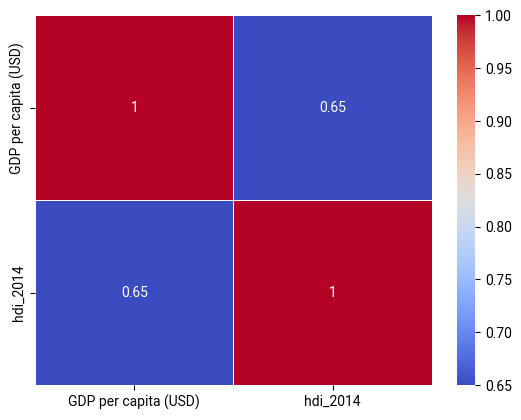

In [43]:
(sns
 .heatmap(correlation_matrix, 
          annot=True, 
          cmap='coolwarm', 
          linewidths=.5)
)

In [44]:
plt.savefig("Final_Project_Image.png")

<Figure size 640x480 with 0 Axes>